# Тестовое задание Uga Dooga

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')

Посмотрим на данные

In [4]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [5]:
df.shape

(860079, 16)

Как видно из отчета ниже - в данных много пропусков. Особенно в колонке city. 

In [6]:
df.isna().sum()

profile_id                     14
os_version                      0
device_manufacturer             0
device_model                    0
device_type                     0
device_locale                   0
event_name                      0
event_json                      0
event_datetime                  0
event_timestamp                 0
event_receive_datetime          0
event_receive_timestamp         0
connection_type                 0
operator_name               18879
country_iso_code                0
city                       323708
dtype: int64

Заполним эти пропуски.

In [7]:
df = df.fillna('no data')

In [8]:
df.dtypes

profile_id                 object
os_version                 object
device_manufacturer        object
device_model               object
device_type                object
device_locale              object
event_name                 object
event_json                 object
event_datetime             object
event_timestamp             int64
event_receive_datetime     object
event_receive_timestamp     int64
connection_type            object
operator_name              object
country_iso_code           object
city                       object
dtype: object

In [9]:
df.event_json.nunique()

860076

Развернем колонку с записанными событиями о показе рекламы event_json.

In [10]:
df_json = df.event_json.apply(ast.literal_eval).apply(pd.Series)

In [11]:
df_json.tail()

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
860074,banner,,1,0,637794449687371810,474.15260,0.00002,1.007506,0.080914,0.080914,0.00002,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,165277
860075,banner,,1,0,637794223717667630,10.89967,0.00674,0.277541,3.379858,3.379858,0.00674,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMeYrb2S4vUCFZWVyAodrPYHvA
860076,banner,,1,0,637794223868486920,25.97572,0.00278,0.280321,3.319878,3.319878,0.00278,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CNrdyMCS4vUCFRNXcgodTqsMOA
860077,banner,,1,0,637794223980531730,37.18013,0.00278,0.283101,3.265896,3.265896,0.00278,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CJnr0ciS4vUCFQ7HhwodgC8HVw
860078,banner,,1,0,637794259045615450,3543.68800,0.00278,0.285881,3.217312,3.217312,0.00278,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CLbXws2S4vUCFQk9hwodpIsKXQ


In [12]:
df_json.placement[0]           

''

Заполним пропуски в колонке placement.

In [13]:
df_json.placement = df_json.placement.replace('', 'no data')

In [14]:
df.event_json[860078]

'{"ad_type":"banner","placement":"","view_index":1,"session_view_index":0,"cur_ticks":637794259045615450,"session_length":3543.688,"revenue":0.002780058,"ads_ltv":0.285881013,"ecpm_sma":3.21731209754944,"normalized_ecpm_sma":3.21731209754944,"value":0.002780058,"currency":"USD","ad_country_code":"US","network_name":"Google AdMob","ad_unit_id":"64c6b1114ea8c1cc","ad_network_placement":"ca-app-pub-7511632782617496/4884242584","creativeId":"CLbXws2S4vUCFQk9hwodpIsKXQ"}'

Объединим основной датафрейм с получившимся из развернутых значений. 

In [15]:
df = pd.concat([df, df_json], axis=1)

In [16]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,no data,US,Norwalk,banner,no data,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,no data,US,Norwalk,banner,no data,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte,banner,no data,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,no data,banner,no data,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


Приведем колонки с датами к нужному типу данных и еще раз проверим тип данных всех колонок и пропущенные значения. 

In [17]:
df.event_datetime = pd.to_datetime(df.event_datetime)
df.event_receive_datetime = pd.to_datetime(df.event_receive_datetime)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   profile_id               860079 non-null  object        
 1   os_version               860079 non-null  object        
 2   device_manufacturer      860079 non-null  object        
 3   device_model             860079 non-null  object        
 4   device_type              860079 non-null  object        
 5   device_locale            860079 non-null  object        
 6   event_name               860079 non-null  object        
 7   event_json               860079 non-null  object        
 8   event_datetime           860079 non-null  datetime64[ns]
 9   event_timestamp          860079 non-null  int64         
 10  event_receive_datetime   860079 non-null  datetime64[ns]
 11  event_receive_timestamp  860079 non-null  int64         
 12  connection_type 

# Задачи
1.  Для каждого формата рекламы:
    - построить распределение средних eCPM-ов юзеров
    - построить распределение eCPM-ов по городам, версиям ОС
    - построить распределение доходов по городам, версиям ОС
2. Учесть статистическую значимость (отобразить, отфильтровать незначимое или хотя бы прокомментировать). Объяснить решение.
3. Описать наблюдения и вывод по исследованию.

### Распределение средних ecpm по юзерам

Сгруппируем данные по profile_id юзеров и посмотрим на средние значения колонок ecpm_sma и normalized_ecpm_sma по разным форматам рекламы: banner, int и rv.  

#### users_mean_ecpm_banner

In [25]:
users_mean_ecpm_banner = df.query('ad_type == "banner"').groupby('profile_id', as_index=False) \
    .agg({'ecpm_sma':'mean', 'normalized_ecpm_sma':'mean'}) \
    .rename(columns={'ecpm_sma': 'mean_ecpm_sma', 'normalized_ecpm_sma':'mean_normalized_ecpm_sma'})

In [26]:
users_mean_ecpm_banner.head()

,profile_id,mean_ecpm_sma,mean_normalized_ecpm_sma
0,JL00qCZH1HV,5.379373,5.379373
1,JL015rw9vmN,1.208829,1.208829
2,JL01aCdFTJy,0.644109,0.644109
3,JL04ODuw9UP,0.210804,0.210804
4,JL06OWhBYxn,0.332892,0.332892


#### users_mean_ecpm_int

In [27]:
users_mean_ecpm_int = df.query('ad_type == "int"').groupby('profile_id', as_index=False) \
    .agg({'ecpm_sma':'mean', 'normalized_ecpm_sma':'mean'}) \
    .rename(columns={'ecpm_sma': 'mean_ecpm_sma', 'normalized_ecpm_sma':'mean_normalized_ecpm_sma'})

In [28]:
users_mean_ecpm_int.head()

,profile_id,mean_ecpm_sma,mean_normalized_ecpm_sma
0,JL015rw9vmN,30.450380,31.143465
1,JL01aCdFTJy,36.256828,36.549221
2,JL04ODuw9UP,36.490028,36.930372
3,JL06b4k4ygp,11.786674,11.881729
4,JL06eD8uPpv,32.222013,32.611441


#### users_mean_ecpm_rv

In [29]:
users_mean_ecpm_rv = df.query('ad_type == "rv"').groupby('profile_id', as_index=False) \
    .agg({'ecpm_sma':'mean', 'normalized_ecpm_sma':'mean'}) \
    .rename(columns={'ecpm_sma': 'mean_ecpm_sma', 'normalized_ecpm_sma':'mean_normalized_ecpm_sma'})

In [30]:
users_mean_ecpm_rv.head()

,profile_id,mean_ecpm_sma,mean_normalized_ecpm_sma
0,JL04ODuw9UP,54.252235,54.916929
1,JL06eD8uPpv,122.395164,123.382225
2,JL0GsLmgQqj,18.886984,19.039299
3,JL0aZ4tP8jc,22.715475,23.043731
4,JL0axMwodcw,208.103504,212.355438


#### Banner

Визуализируем полученные распределения.

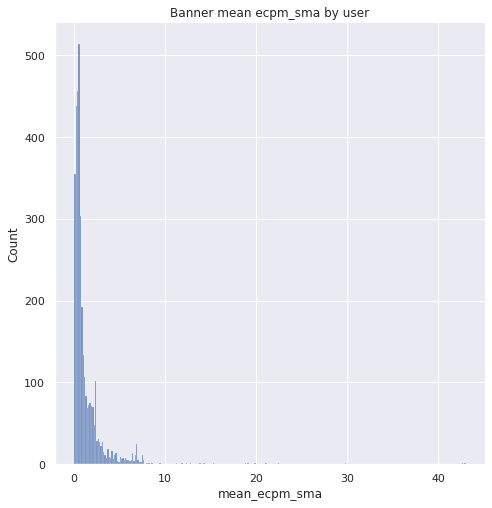

In [168]:
sns.displot(users_mean_ecpm_banner.mean_ecpm_sma, height=7).set(title='Banner mean ecpm_sma by user');

In [169]:
ss.shapiro(users_mean_ecpm_banner.mean_ecpm_sma) 

ShapiroResult(statistic=0.4865484833717346, pvalue=0.0)

Исходя из формы распределения и результата теста Шапиро-Уилка, в котором p-value значительно меньше 0.05 мы принимаем делаем вывод о том, что данные распределены ненормально. Форма распределения напоминает экспоненциальное распределение.

Сделаем тоже самое с нормализованным ecpm. 

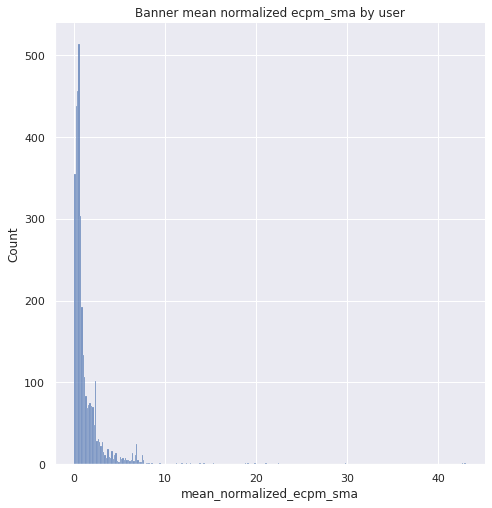

In [67]:
sns.displot(users_mean_ecpm_banner.mean_normalized_ecpm_sma, height=7).set(title='Banner mean normalized ecpm_sma by user');

In [170]:
ss.shapiro(users_mean_ecpm_banner.mean_normalized_ecpm_sma) 

ShapiroResult(statistic=0.4865484833717346, pvalue=0.0)

Результат такой же - данные распределены ненормально.

Посмотрим на возможные выбросы в данных с помощью boxplot. 

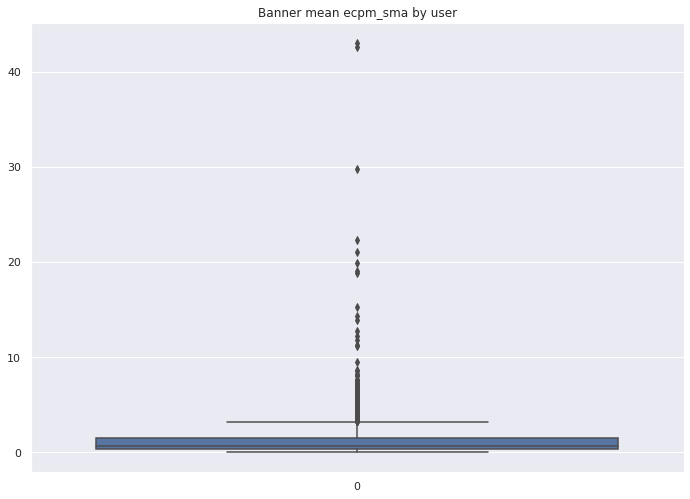

In [171]:
sns.boxplot(data=users_mean_ecpm_banner.mean_ecpm_sma).set(title='Banner mean ecpm_sma by user');

Исходя из графика видим, что выбросов достаточно много и боксплот прижат к нижней границе графика. Так как данные распределены ненормально воспользуемся межквартильным расмахом IQR для фильтрации выбросов. 

In [180]:
q25, q75 = np.percentile(users_mean_ecpm_banner.mean_ecpm_sma, 25), np.percentile(users_mean_ecpm_banner.mean_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

Перцентили: 25й=0.355, 75й=1.501, IQR=1.146


In [181]:
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [182]:
outliers = [x for x in users_mean_ecpm_banner.mean_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

Найденные выбросы: 282


In [183]:
outliers_removed = [x for x in users_mean_ecpm_banner.mean_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Наблюдений без выбросов: 3227


Тоже самое проделаем c normalized ecpm. 

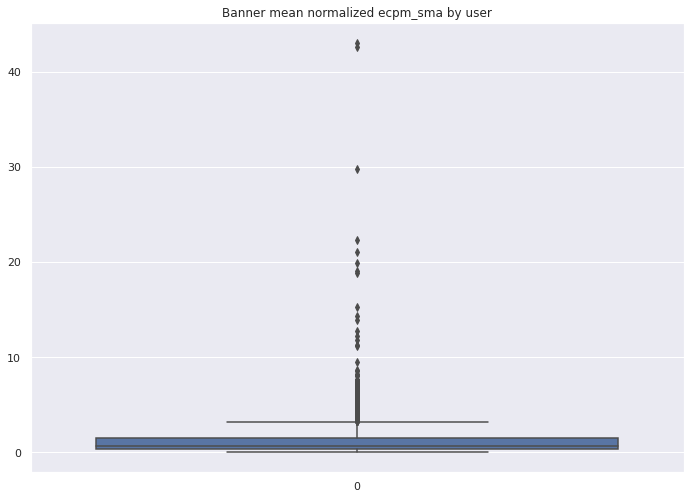

In [184]:
sns.boxplot(data=users_mean_ecpm_banner.mean_normalized_ecpm_sma).set(title='Banner mean normalized ecpm_sma by user');

In [185]:
q25, q75 = np.percentile(users_mean_ecpm_banner.mean_normalized_ecpm_sma, 25), np.percentile(users_mean_ecpm_banner.mean_normalized_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

Перцентили: 25й=0.355, 75й=1.501, IQR=1.146


In [186]:
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [187]:
outliers = [x for x in users_mean_ecpm_banner.mean_normalized_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

Найденные выбросы: 282


In [188]:
outliers_removed = [x for x in users_mean_ecpm_banner.mean_normalized_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Наблюдений без выбросов: 3227


Результаты получились идентичными. 

Повторим тоже самое для оставшихся типов рекламы. 

#### Int

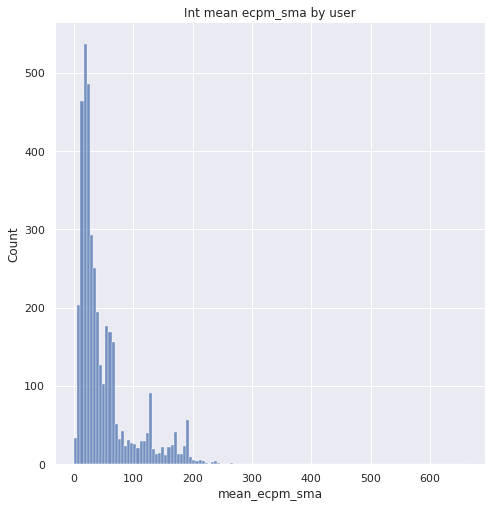

In [189]:
sns.displot(users_mean_ecpm_int.mean_ecpm_sma, height=7).set(title='Int mean ecpm_sma by user');

In [191]:
ss.shapiro(users_mean_ecpm_int.mean_ecpm_sma) 

ShapiroResult(statistic=0.7315653562545776, pvalue=0.0)

Распределение ненормально.

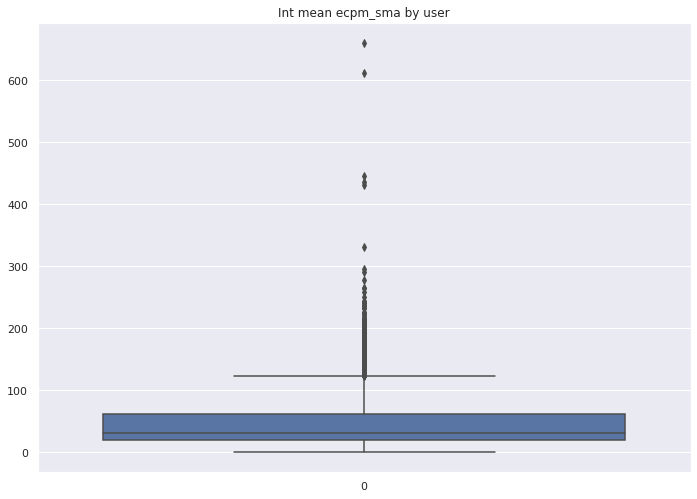

In [194]:
sns.boxplot(data=users_mean_ecpm_int.mean_ecpm_sma).set(title='Int mean ecpm_sma by user');

Выбросы есть. Снова смотрим на размахи. 

In [195]:
q25, q75 = np.percentile(users_mean_ecpm_int.mean_ecpm_sma, 25), np.percentile(users_mean_ecpm_int.mean_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in users_mean_ecpm_int.mean_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in users_mean_ecpm_int.mean_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=19.584, 75й=61.069, IQR=41.486
Найденные выбросы: 439
Наблюдений без выбросов: 3524


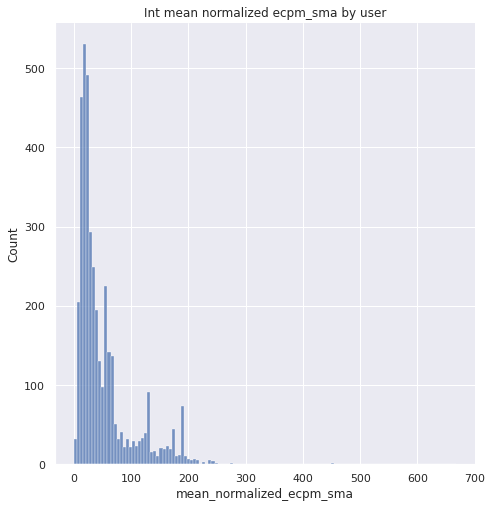

In [192]:
sns.displot(users_mean_ecpm_int.mean_normalized_ecpm_sma, height=7).set(title='Int mean normalized ecpm_sma by user');

In [193]:
ss.shapiro(users_mean_ecpm_int.mean_normalized_ecpm_sma) 

ShapiroResult(statistic=0.7316707372665405, pvalue=0.0)

Распределение также ненормально.

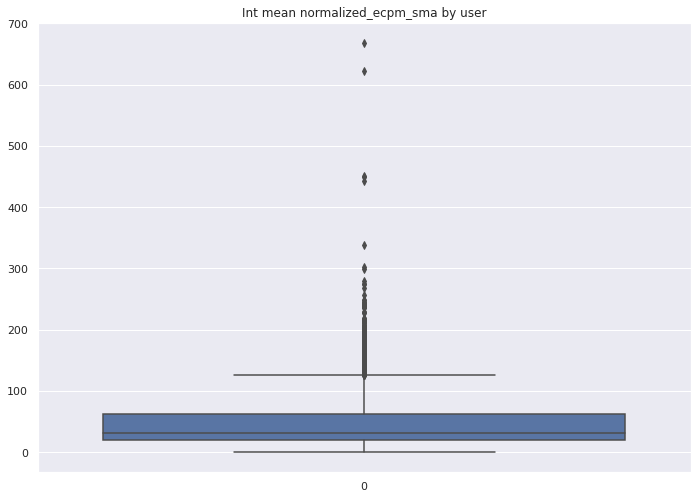

In [196]:
sns.boxplot(data=users_mean_ecpm_int.mean_normalized_ecpm_sma).set(title='Int mean normalized_ecpm_sma by user');

In [197]:
q25, q75 = np.percentile(users_mean_ecpm_int.mean_normalized_ecpm_sma, 25), np.percentile(users_mean_ecpm_int.mean_normalized_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in users_mean_ecpm_int.mean_normalized_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in users_mean_ecpm_int.mean_normalized_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=19.932, 75й=62.268, IQR=42.336
Найденные выбросы: 435
Наблюдений без выбросов: 3528


Результаты фильтрации в нормализованных данных по типу рекламы Int незначительно отличаются. 

#### RV

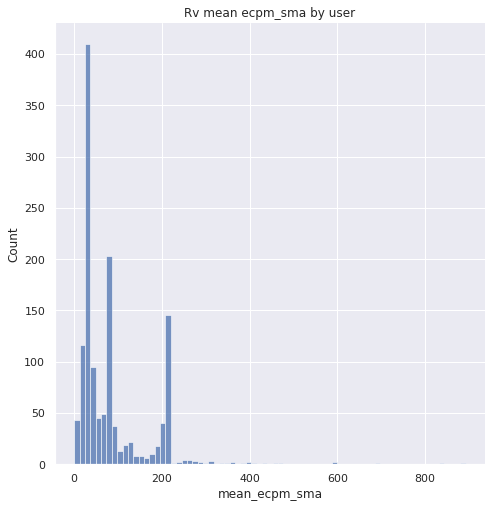

In [198]:
sns.displot(users_mean_ecpm_rv.mean_ecpm_sma, height=7).set(title='Rv mean ecpm_sma by user');

In [200]:
ss.shapiro(users_mean_ecpm_rv.mean_ecpm_sma) 

ShapiroResult(statistic=0.7191077470779419, pvalue=1.8525165698374082e-42)

Данные ненормальны.

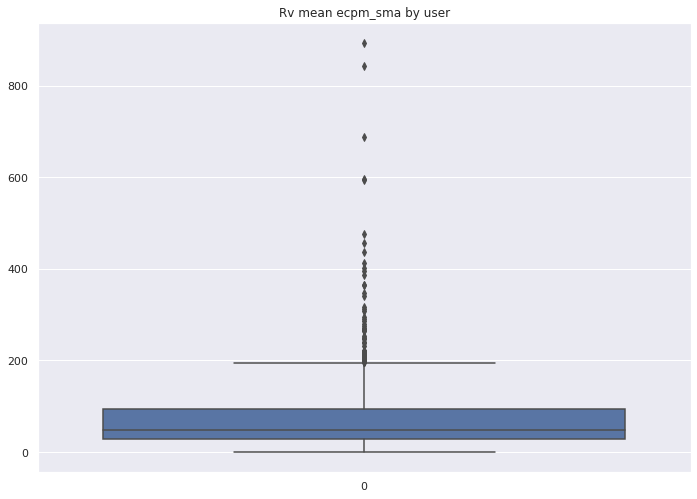

In [202]:
sns.boxplot(data=users_mean_ecpm_rv.mean_ecpm_sma).set(title='Rv mean ecpm_sma by user');

In [203]:
q25, q75 = np.percentile(users_mean_ecpm_rv.mean_ecpm_sma, 25), np.percentile(users_mean_ecpm_rv.mean_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in users_mean_ecpm_rv.mean_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in users_mean_ecpm_rv.mean_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=28.014, 75й=95.183, IQR=67.169
Найденные выбросы: 222
Наблюдений без выбросов: 1102


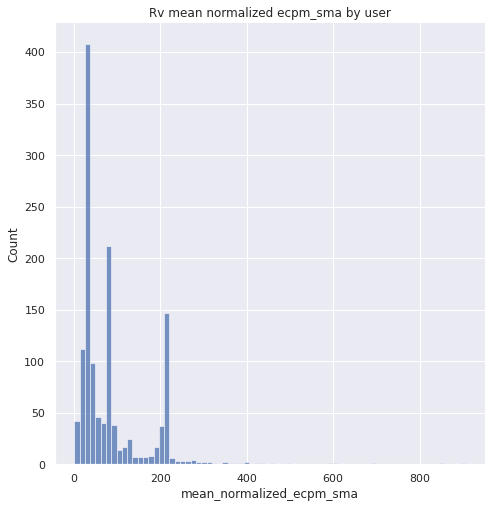

In [199]:
sns.displot(users_mean_ecpm_rv.mean_normalized_ecpm_sma, height=7).set(title='Rv mean normalized ecpm_sma by user');

In [201]:
ss.shapiro(users_mean_ecpm_rv.mean_normalized_ecpm_sma) 

ShapiroResult(statistic=0.7187854051589966, pvalue=1.7810503481568425e-42)

Данные ненормальны.

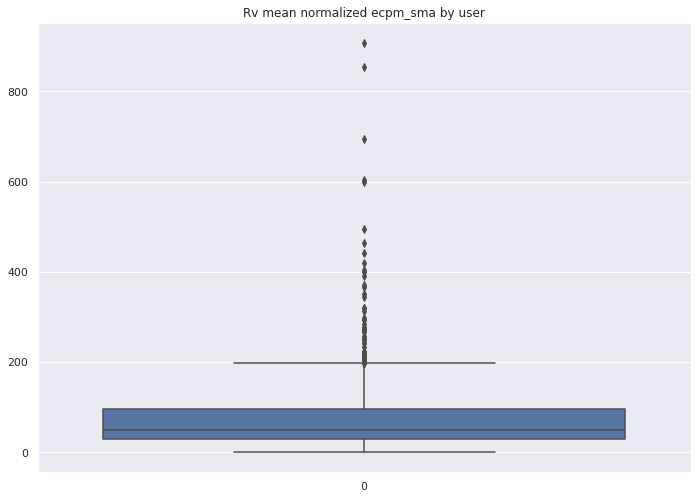

In [204]:
sns.boxplot(data=users_mean_ecpm_rv.mean_normalized_ecpm_sma).set(title='Rv mean normalized ecpm_sma by user');

In [205]:
q25, q75 = np.percentile(users_mean_ecpm_rv.mean_normalized_ecpm_sma, 25), np.percentile(users_mean_ecpm_rv.mean_normalized_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in users_mean_ecpm_rv.mean_normalized_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in users_mean_ecpm_rv.mean_normalized_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=28.240, 75й=96.048, IQR=67.808
Найденные выбросы: 225
Наблюдений без выбросов: 1099


### Распределение средних ecpm по городам и версиям ОС

Сгруппируем данные по разным форматам рекламы, городам и версиям операционных систем и посмотрим на них.

In [212]:
banner_city_os_mean_ecpm = df.query('ad_type == "banner"').groupby(['city', 'os_version'], as_index=False) \
    .agg({'ecpm_sma':'mean', 'normalized_ecpm_sma':'mean'}) \
    .rename(columns={'ecpm_sma': 'mean_ecpm_sma', 'normalized_ecpm_sma':'mean_normalized_ecpm_sma'})

In [213]:
banner_city_os_mean_ecpm.head()

,city,os_version,mean_ecpm_sma,mean_normalized_ecpm_sma
0,Aberdeen,11,0.337810,0.337810
1,Abilene,9,1.153814,1.153814
2,Addison,12,0.489450,0.489450
3,Afton,11,0.361523,0.361523
4,Akron,9,0.376746,0.376746


In [214]:
banner_city_os_mean_ecpm.describe()

,mean_ecpm_sma,mean_normalized_ecpm_sma
count,1410.000000,1410.000000
mean,1.083824,1.083824
std,1.488999,1.488999
min,0.012760,0.012760
25%,0.355952,0.355952
50%,0.589547,0.589547
75%,1.170902,1.170902
max,21.012421,21.012421


In [216]:
int_city_os_mean_ecpm = df.query('ad_type == "int"').groupby(['city', 'os_version'], as_index=False) \
    .agg({'ecpm_sma':'mean', 'normalized_ecpm_sma':'mean'}) \
    .rename(columns={'ecpm_sma': 'mean_ecpm_sma', 'normalized_ecpm_sma':'mean_normalized_ecpm_sma'})

In [217]:
int_city_os_mean_ecpm.head()

,city,os_version,mean_ecpm_sma,mean_normalized_ecpm_sma
0,Aberdeen,11,15.321452,15.508930
1,Abilene,10,43.893208,44.247185
2,Abilene,11,189.868790,191.399994
3,Abilene,9,32.689328,33.614950
4,Afton,11,33.802259,35.249553


In [219]:
int_city_os_mean_ecpm.describe()

,mean_ecpm_sma,mean_normalized_ecpm_sma
count,1462.000000,1462.000000
mean,49.394709,50.442215
std,49.104322,50.025436
min,2.396778,2.446164
25%,19.680097,20.074023
50%,32.924330,33.820528
75%,59.895085,61.560666
max,612.357198,622.150350


In [220]:
rv_city_os_mean_ecpm = df.query('ad_type == "rv"').groupby(['city', 'os_version'], as_index=False) \
    .agg({'ecpm_sma':'mean', 'normalized_ecpm_sma':'mean'}) \
    .rename(columns={'ecpm_sma': 'mean_ecpm_sma', 'normalized_ecpm_sma':'mean_normalized_ecpm_sma'})

In [221]:
rv_city_os_mean_ecpm.head()

,city,os_version,mean_ecpm_sma,mean_normalized_ecpm_sma
0,Aberdeen,11,18.886984,19.039299
1,Abilene,10,45.250385,45.615307
2,Abilene,9,60.879490,61.370453
3,Akron,10,209.328957,211.872108
4,Akron,9,156.262418,159.412358


In [222]:
rv_city_os_mean_ecpm.describe()

,mean_ecpm_sma,mean_normalized_ecpm_sma
count,639.000000,639.000000
mean,84.090637,85.249464
std,80.206827,81.217623
min,4.041922,4.074518
25%,28.014080,28.312009
50%,56.754097,57.503006
75%,112.778731,114.114900
max,892.413269,906.843892


Снова посмотрим на распределения и проведем тесты на нормальность, а также проверим выбросы. 

#### Banner

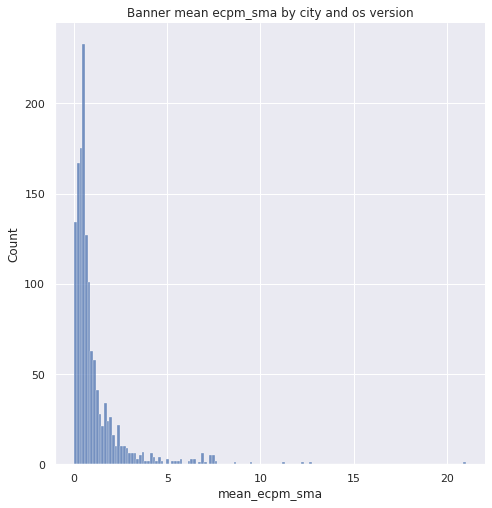

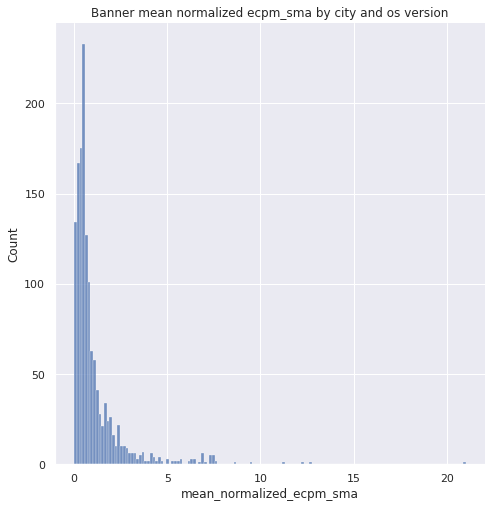

In [223]:
sns.displot(banner_city_os_mean_ecpm.mean_ecpm_sma, height=7).set(title='Banner mean ecpm_sma by city and os version');
sns.displot(banner_city_os_mean_ecpm.mean_normalized_ecpm_sma, height=7).set(title='Banner mean normalized ecpm_sma by city and os version');

In [226]:
ss.shapiro(banner_city_os_mean_ecpm.mean_ecpm_sma) 

ShapiroResult(statistic=0.7187854051589966, pvalue=1.7810503481568425e-42)

In [227]:
ss.shapiro(banner_city_os_mean_ecpm.mean_normalized_ecpm_sma) 

ShapiroResult(statistic=0.5815467834472656, pvalue=0.0)

В обоих случаях данные ненормальны. 

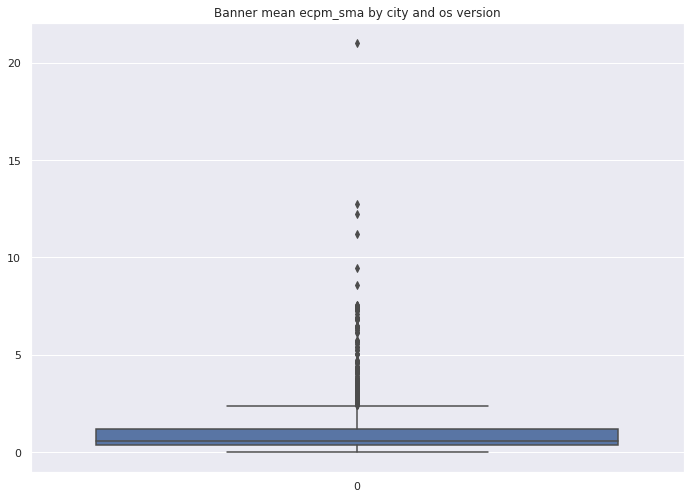

In [228]:
sns.boxplot(data=banner_city_os_mean_ecpm.mean_ecpm_sma).set(title='Banner mean ecpm_sma by city and os version');

In [230]:
q25, q75 = np.percentile(banner_city_os_mean_ecpm.mean_ecpm_sma, 25), np.percentile(banner_city_os_mean_ecpm.mean_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in banner_city_os_mean_ecpm.mean_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in banner_city_os_mean_ecpm.mean_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=0.356, 75й=1.171, IQR=0.815
Найденные выбросы: 135
Наблюдений без выбросов: 1275


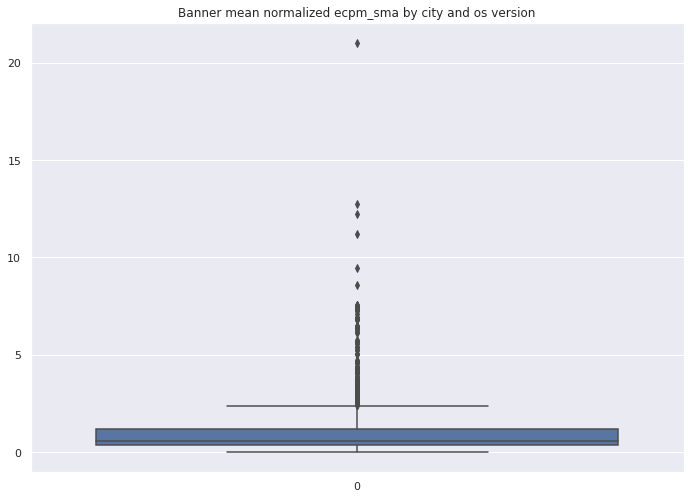

In [229]:
sns.boxplot(data=banner_city_os_mean_ecpm.mean_normalized_ecpm_sma).set(title='Banner mean normalized ecpm_sma by city and os version');

In [231]:
q25, q75 = np.percentile(banner_city_os_mean_ecpm.mean_normalized_ecpm_sma, 25), np.percentile(banner_city_os_mean_ecpm.mean_normalized_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in banner_city_os_mean_ecpm.mean_normalized_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in banner_city_os_mean_ecpm.mean_normalized_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=0.356, 75й=1.171, IQR=0.815
Найденные выбросы: 135
Наблюдений без выбросов: 1275


#### Int

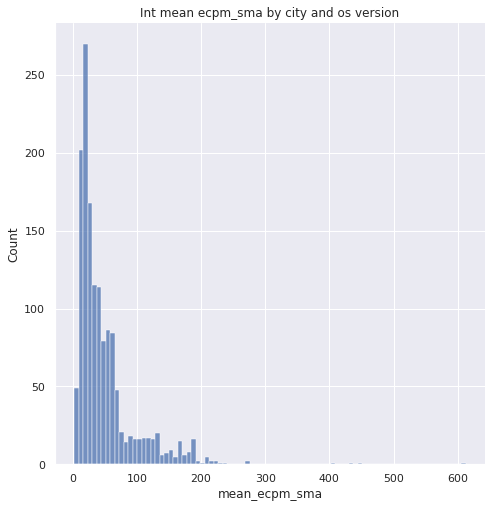

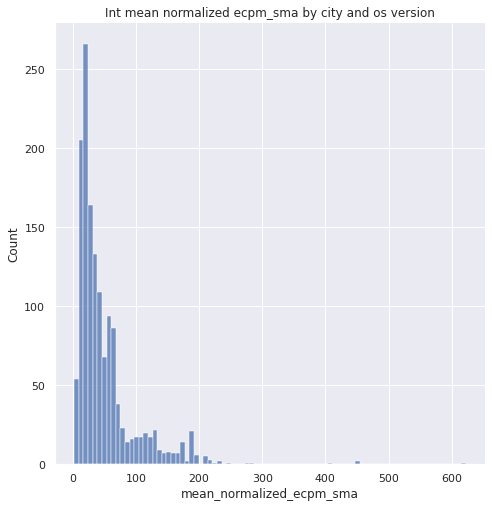

In [232]:
sns.displot(int_city_os_mean_ecpm.mean_ecpm_sma, height=7).set(title='Int mean ecpm_sma by city and os version');
sns.displot(int_city_os_mean_ecpm.mean_normalized_ecpm_sma, height=7).set(title='Int mean normalized ecpm_sma by city and os version');

In [233]:
ss.shapiro(int_city_os_mean_ecpm.mean_ecpm_sma) 

ShapiroResult(statistic=0.7059509754180908, pvalue=8.407790785948902e-45)

In [234]:
ss.shapiro(int_city_os_mean_ecpm.mean_normalized_ecpm_sma) 

ShapiroResult(statistic=0.7072240710258484, pvalue=8.407790785948902e-45)

Распределения ненормальны. 

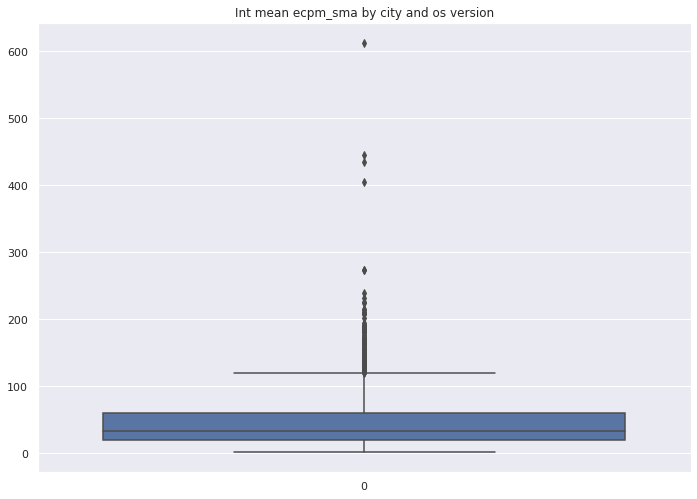

In [246]:
sns.boxplot(data=int_city_os_mean_ecpm.mean_ecpm_sma).set(title='Int mean ecpm_sma by city and os version');

In [236]:
q25, q75 = np.percentile(int_city_os_mean_ecpm.mean_ecpm_sma, 25), np.percentile(int_city_os_mean_ecpm.mean_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in int_city_os_mean_ecpm.mean_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in int_city_os_mean_ecpm.mean_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=19.680, 75й=59.895, IQR=40.215
Найденные выбросы: 132
Наблюдений без выбросов: 1330


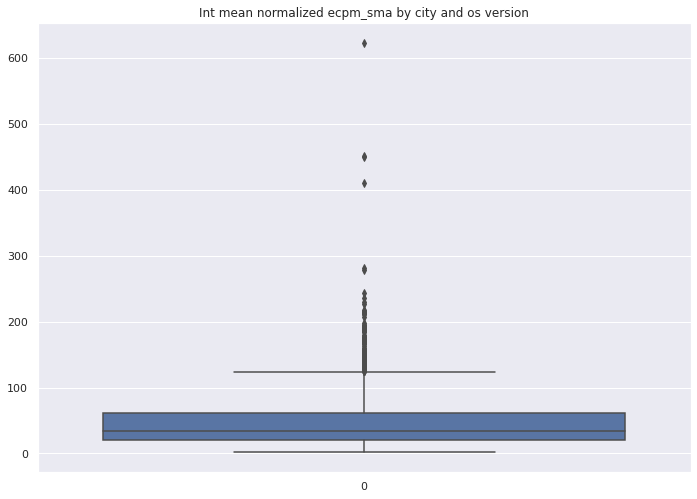

In [237]:
sns.boxplot(data=int_city_os_mean_ecpm.mean_normalized_ecpm_sma).set(title='Int mean normalized ecpm_sma by city and os version');

In [238]:
q25, q75 = np.percentile(int_city_os_mean_ecpm.mean_normalized_ecpm_sma, 25), np.percentile(int_city_os_mean_ecpm.mean_normalized_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in int_city_os_mean_ecpm.mean_normalized_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in int_city_os_mean_ecpm.mean_normalized_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=20.074, 75й=61.561, IQR=41.487
Найденные выбросы: 129
Наблюдений без выбросов: 1333


#### Rv

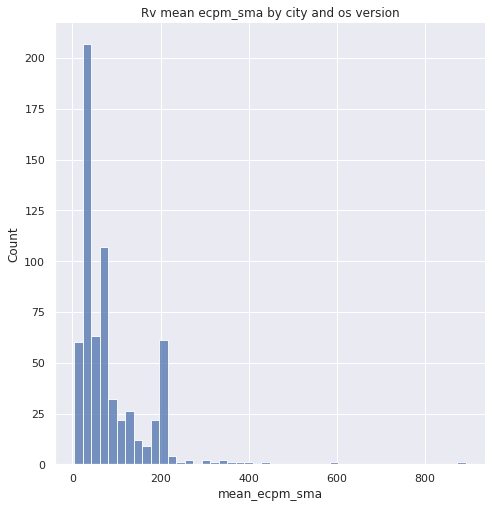

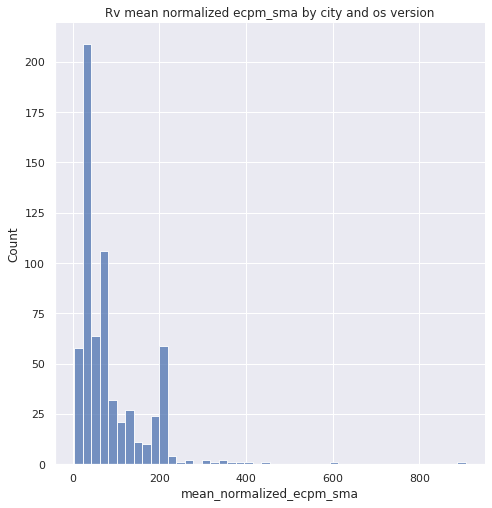

In [239]:
sns.displot(rv_city_os_mean_ecpm.mean_ecpm_sma, height=7).set(title='Rv mean ecpm_sma by city and os version');
sns.displot(rv_city_os_mean_ecpm.mean_normalized_ecpm_sma, height=7).set(title='Rv mean normalized ecpm_sma by city and os version');

In [240]:
ss.shapiro(rv_city_os_mean_ecpm.mean_ecpm_sma) 

ShapiroResult(statistic=0.7393709421157837, pvalue=1.8677612176938574e-30)

In [241]:
ss.shapiro(rv_city_os_mean_ecpm.mean_normalized_ecpm_sma) 

ShapiroResult(statistic=0.7389593124389648, pvalue=1.787197348786805e-30)

Распределения ненормальны и похожи на экспоненциальные как и в предыдущих графиках.

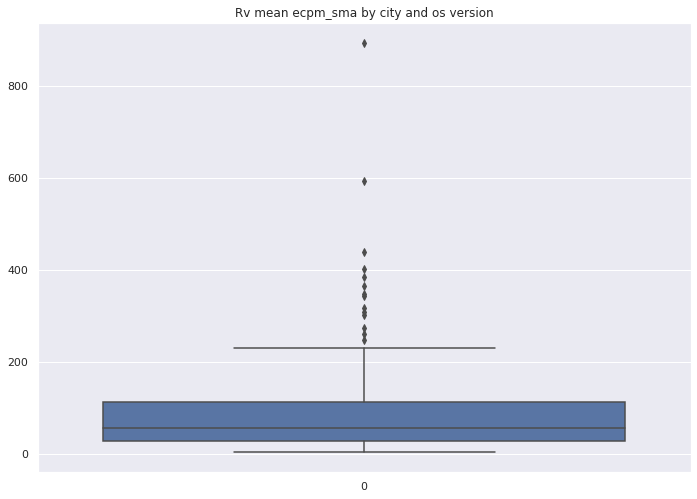

In [244]:
sns.boxplot(data=rv_city_os_mean_ecpm.mean_ecpm_sma).set(title='Rv mean ecpm_sma by city and os version');

In [243]:
q25, q75 = np.percentile(rv_city_os_mean_ecpm.mean_ecpm_sma, 25), np.percentile(rv_city_os_mean_ecpm.mean_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in rv_city_os_mean_ecpm.mean_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in rv_city_os_mean_ecpm.mean_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=28.014, 75й=112.779, IQR=84.765
Найденные выбросы: 14
Наблюдений без выбросов: 625


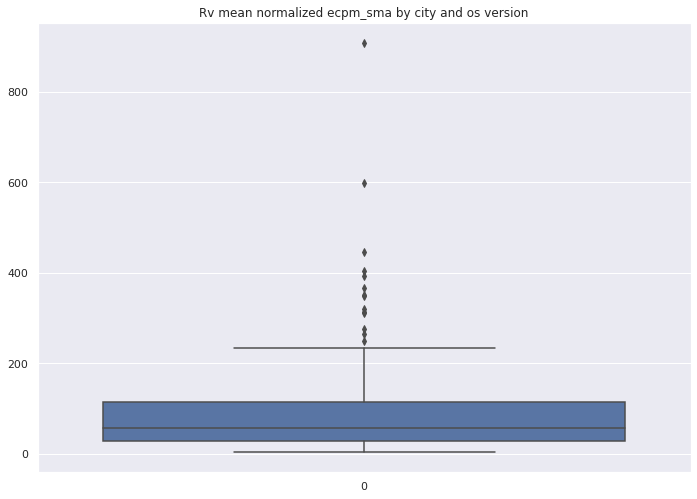

In [245]:
sns.boxplot(data=rv_city_os_mean_ecpm.mean_normalized_ecpm_sma).set(title='Rv mean normalized ecpm_sma by city and os version');

In [247]:
q25, q75 = np.percentile(rv_city_os_mean_ecpm.mean_normalized_ecpm_sma, 25), np.percentile(rv_city_os_mean_ecpm.mean_normalized_ecpm_sma, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in rv_city_os_mean_ecpm.mean_normalized_ecpm_sma if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in rv_city_os_mean_ecpm.mean_normalized_ecpm_sma if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=28.312, 75й=114.115, IQR=85.803
Найденные выбросы: 14
Наблюдений без выбросов: 625


### Распределение суммарных доходов по городам и версиям ОС

Снова по каждому формату рекламы сгруппируем данные по городу и версии операционной системы, а также посчитаем суммарный доход. 

In [20]:
banner_city_os_sum_revenue = df.query('ad_type == "banner"').groupby(['city', 'os_version'], as_index=False) \
    .agg({'revenue':'sum'}) \
    .rename(columns={'revenue': 'sum_revenue'})

In [21]:
banner_city_os_sum_revenue.head()

,city,os_version,sum_revenue
0,Aberdeen,11,0.030866
1,Abilene,9,0.043299
2,Addison,12,0.000142
3,Afton,11,0.110404
4,Akron,9,0.131979


In [22]:
banner_city_os_sum_revenue.describe()

,sum_revenue
count,1410.000000
mean,0.430627
std,3.966496
min,0.000031
25%,0.016832
50%,0.068813
75%,0.225140
max,135.736458


In [23]:
int_city_os_sum_revenue = df.query('ad_type == "int"').groupby(['city', 'os_version'], as_index=False) \
    .agg({'revenue':'sum'}) \
    .rename(columns={'revenue': 'sum_revenue'})

In [24]:
int_city_os_sum_revenue.head()

,city,os_version,sum_revenue
0,Aberdeen,11,0.081500
1,Abilene,10,0.044247
2,Abilene,11,0.191400
3,Abilene,9,0.166763
4,Afton,11,0.727219


In [25]:
int_city_os_sum_revenue.describe()

,sum_revenue
count,1462.000000
mean,0.931568
std,7.669900
min,0.002595
25%,0.066480
50%,0.202220
75%,0.595283
max,248.565837


In [26]:
rv_city_os_sum_revenue = df.query('ad_type == "rv"').groupby(['city', 'os_version'], as_index=False) \
    .agg({'revenue':'sum'}) \
    .rename(columns={'revenue': 'sum_revenue'})

In [27]:
rv_city_os_sum_revenue.head()

,city,os_version,sum_revenue
0,Aberdeen,11,0.021516
1,Abilene,10,0.045615
2,Abilene,9,0.061370
3,Akron,10,0.423400
4,Akron,9,1.232896


In [28]:
rv_city_os_sum_revenue.describe()

,sum_revenue
count,639.000000
mean,0.659877
std,3.258760
min,0.001845
25%,0.062938
50%,0.190895
75%,0.481860
max,67.837706


#### Banner

Посмотрим на распределения сумм доходов. 

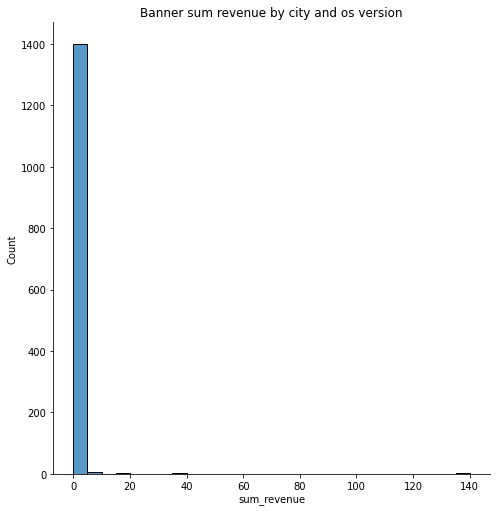

In [37]:
sns.displot(banner_city_os_sum_revenue.sum_revenue, binwidth=5, height=7).set(title='Banner sum revenue by city and os version');

In [38]:
ss.shapiro(banner_city_os_sum_revenue.sum_revenue) 

ShapiroResult(statistic=0.05568617582321167, pvalue=0.0)

Очевидно, что распределение ненормально.

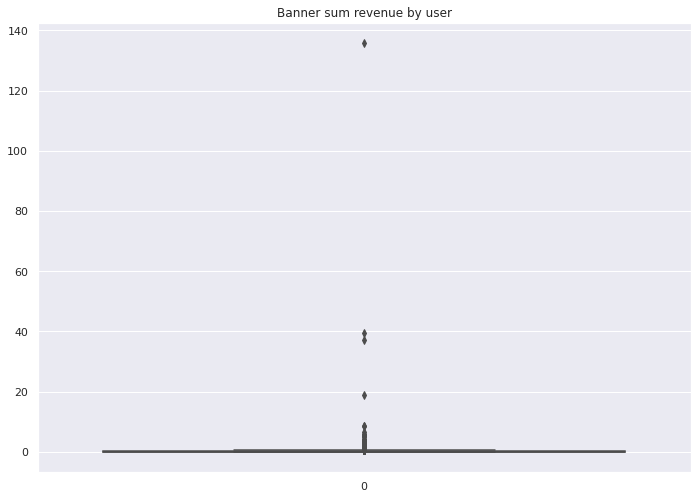

In [43]:
sns.boxplot(data=banner_city_os_sum_revenue.sum_revenue).set(title='Banner sum revenue by user');

In [35]:
q25, q75 = np.percentile(banner_city_os_sum_revenue.sum_revenue, 25), np.percentile(banner_city_os_sum_revenue.sum_revenue, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in banner_city_os_sum_revenue.sum_revenue if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in banner_city_os_sum_revenue.sum_revenue if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=0.017, 75й=0.225, IQR=0.208
Найденные выбросы: 179
Наблюдений без выбросов: 1231


#### Int

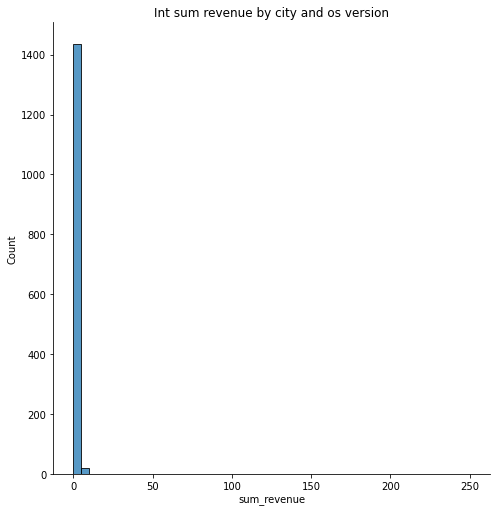

In [40]:
sns.displot(int_city_os_sum_revenue.sum_revenue, binwidth=5, height=7).set(title='Int sum revenue by city and os version');

In [37]:
ss.shapiro(int_city_os_sum_revenue.sum_revenue) 

ShapiroResult(statistic=0.06021559238433838, pvalue=0.0)

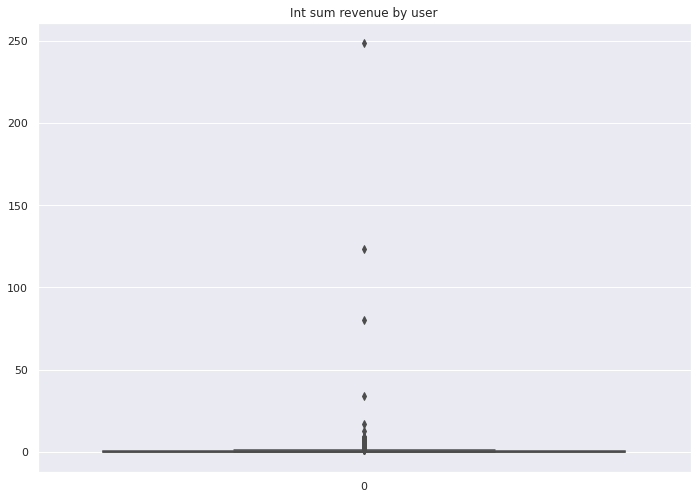

In [44]:
sns.boxplot(data=int_city_os_sum_revenue.sum_revenue).set(title='Int sum revenue by user');

In [39]:
q25, q75 = np.percentile(int_city_os_sum_revenue.sum_revenue, 25), np.percentile(int_city_os_sum_revenue.sum_revenue, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in int_city_os_sum_revenue.sum_revenue if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in int_city_os_sum_revenue.sum_revenue if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=0.066, 75й=0.595, IQR=0.529
Найденные выбросы: 155
Наблюдений без выбросов: 1307


#### Rv

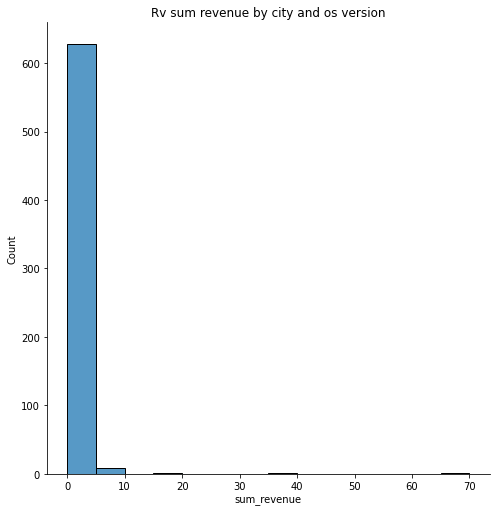

In [41]:
sns.displot(rv_city_os_sum_revenue.sum_revenue, binwidth=5, height=7).set(title='Rv sum revenue by city and os version');

In [41]:
ss.shapiro(rv_city_os_sum_revenue.sum_revenue) 

ShapiroResult(statistic=0.13208186626434326, pvalue=0.0)

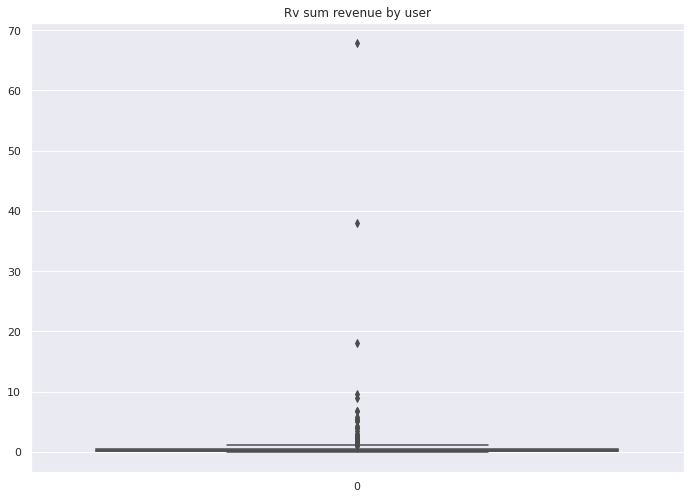

In [45]:
sns.boxplot(data=rv_city_os_sum_revenue.sum_revenue).set(title='Rv sum revenue by user');

In [43]:
q25, q75 = np.percentile(rv_city_os_sum_revenue.sum_revenue, 25), np.percentile(rv_city_os_sum_revenue.sum_revenue, 75)
iqr = q75 - q25
print('Перцентили: 25й=%.3f, 75й=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in rv_city_os_sum_revenue.sum_revenue if x < lower or x > upper]
print('Найденные выбросы: %d' % len(outliers))

outliers_removed = [x for x in rv_city_os_sum_revenue.sum_revenue if x >= lower and x <= upper]
print('Наблюдений без выбросов: %d' % len(outliers_removed))

Перцентили: 25й=0.063, 75й=0.482, IQR=0.419
Найденные выбросы: 71
Наблюдений без выбросов: 568


# Выводы

Данные в колонках ecpm, normalized_ecpm и revenue распределены ненормально, что подтверждают визуализации и тесты Шапиро-Уилка. Визуализация данных с помощью боксплотов показывает, что там также содержится немало выбросов. Так как данные распределены ненормально был использован метод IQR, чтобы определить их. В дальнейшем при анализе и сравнении таких значений возможно попробовать логарифмирование для того, чтобы привести данные к нормальному виду. Если это не поможет, то сравнивать группы при АВ-тестировании будет возможно с помощью непараметрических критериев или бутстрапа. 

# Дополнительные (по желанию)
Исследовать:
- Какой процент доходов содержит информацию о городе юзера
- Зависит ли eCPM от времени дня

### Какой процент доходов содержит информацию о городе юзера

Посмотрим на распределение данных в колонке city. Данных нет в 323708 случаях. 

In [287]:
df.city.value_counts().head()

no data        323708
New York        17584
Minneapolis     12980
Houston         10137
Springfield     10135
Name: city, dtype: int64

Всего имеется 860079 наблюдения. 

In [278]:
df.shape[0]

860079

Посчитаем процент данных с информацией о городе юзера. 

In [99]:
(df.shape[0] - df.city.value_counts()[0]) /  df.shape[0] * 100

62.36299223675965

62.36% данных содержат данную информацию. 

### Зависит ли eCPM от времени дня

Из колонки с датами возьмем данные о часе совершения действия. 

In [283]:
df['hour'] = df.event_datetime.dt.hour

Визуализируем распределние.

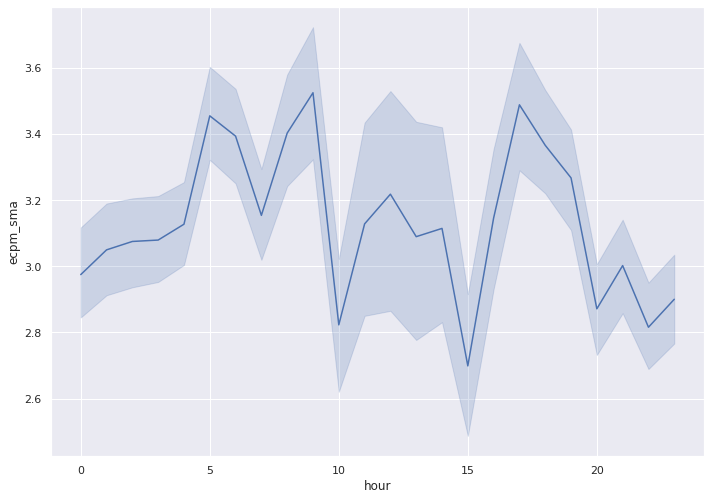

In [284]:
sns.lineplot(x=df.hour, y=df.ecpm_sma);

Наблюдаются циклы в значениях ecpm. Утром и днем с значения повышаются и падают. Вечером и ночью значения ecpm в целом ниже. 